Tarea hecha entre Victoria Álvarez, Felipe Manoli y Franco Berrios con ayuda de Cristobal Muñoz.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [4]:
pob = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')
pob
## Importar dataframe de casos para utilizar el dato de la población total por región.

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,31735.0,12819.5
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,234.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,8530.8
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,10866.4
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,14893.6
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,2154.8


In [5]:
pobl = pob[['Region','Codigo region','Codigo comuna','Comuna','Poblacion']]
pobl = pobl.dropna()
pobl
## Se eliminan las columnas que no se van a utilizar.

,Region,Codigo region,Codigo comuna,Comuna,Poblacion
0,Arica y Parinacota,15,15101.0,Arica,247552.0
1,Arica y Parinacota,15,15102.0,Camarones,1233.0
2,Arica y Parinacota,15,15202.0,General Lagos,810.0
3,Arica y Parinacota,15,15201.0,Putre,2515.0
5,Tarapacá,1,1107.0,Alto Hospicio,129999.0
...,...,...,...,...,...
356,Magallanes,12,12101.0,Punta Arenas,141984.0
357,Magallanes,12,12103.0,Rio Verde,211.0
358,Magallanes,12,12104.0,San Gregorio,681.0
359,Magallanes,12,12303.0,Timaukel,282.0


In [6]:
cuarentena = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv')
cuarentena
## Importar datos sobre las fechas de cuarentena por región.

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,Angol,Activa,NaN,2020-12-10 05:00:00,2020-12-25 22:00:00,9201,NaN,NaN,NaN,9,R09
183,184,Cabo de Hornos,Activa,NaN,2020-12-10 05:00:00,2020-12-25 22:00:00,12201,NaN,NaN,NaN,12,R12
184,185,Los Ángeles,Activa,NaN,2020-12-12 05:00:00,2020-12-25 22:00:00,8301,NaN,NaN,NaN,8,R08
185,186,Paillaco,Histórica,NaN,2020-12-12 05:00:00,2020-12-23 05:00:00,14107,NaN,NaN,NaN,14,R14


In [7]:
cuarentena.drop(['ID','Alcance','Estado','Detalle', 'Superficie en m2','Perímetro en m','n_REGION'], axis=1, inplace=True)
cuarentena = cuarentena.rename(columns = {"Region" : "nRegion", "Código CUT Comuna" : "Codigo comuna", "Nombre" : "Comuna"})
cuarentena
## Se eliminan los datos que no se van a utilizar.

,Comuna,Fecha de Inicio,Fecha de Término,Codigo comuna,nRegion
0,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15
1,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13
2,Puente Alto Poniente,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13
3,El Bosque,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13
4,San Bernardo Nororiente,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13
...,...,...,...,...,...
182,Angol,2020-12-10 05:00:00,2020-12-25 22:00:00,9201,9
183,Cabo de Hornos,2020-12-10 05:00:00,2020-12-25 22:00:00,12201,12
184,Los Ángeles,2020-12-12 05:00:00,2020-12-25 22:00:00,8301,8
185,Paillaco,2020-12-12 05:00:00,2020-12-23 05:00:00,14107,14


In [8]:
cuarentena=cuarentena.rename(columns={'Código CUT Comuna':'Codigo comuna'})
cuarentena
## Se le cambia el nombre a la columna Código CUT Comuna a Codigo comuna para que tenga el mismo nombre que en el otro dataframe.

,Comuna,Fecha de Inicio,Fecha de Término,Codigo comuna,nRegion
0,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15
1,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13
2,Puente Alto Poniente,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13
3,El Bosque,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13
4,San Bernardo Nororiente,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13
...,...,...,...,...,...
182,Angol,2020-12-10 05:00:00,2020-12-25 22:00:00,9201,9
183,Cabo de Hornos,2020-12-10 05:00:00,2020-12-25 22:00:00,12201,12
184,Los Ángeles,2020-12-12 05:00:00,2020-12-25 22:00:00,8301,8
185,Paillaco,2020-12-12 05:00:00,2020-12-23 05:00:00,14107,14


In [9]:
fechas = []
for i in range(len(cuarentena["Fecha de Inicio"])):
    fechas.append(cuarentena["Fecha de Inicio"][i][:10])
cuarentena["Fecha de Inicio"] = np.array(fechas)

fechas = []
for i in range(len(cuarentena["Fecha de Término"])):
    fechas.append(cuarentena["Fecha de Término"][i][:10])
cuarentena["Fecha de Término"] = np.array(fechas)
## Se elimina la hora de las fechas.

In [10]:
cuarentena['Fecha de Inicio'] = pd.to_datetime(cuarentena['Fecha de Inicio'])
cuarentena['Fecha de Término'] = pd.to_datetime(cuarentena['Fecha de Término'])
## Cambiar las fechas de inicio y termino a date.

In [11]:
cuarentena=cuarentena.rename(columns={'Fecha de Inicio': 'Fecha_inicio', 'Fecha de Término':'Fecha_termino'})
cuarentena
## Se eliminan los espacios entre palabras para poder trabajar con ellas y se muestran los cambios.

,Comuna,Fecha_inicio,Fecha_termino,Codigo comuna,nRegion
0,Arica,2020-04-16,2020-05-15,15101,15
1,Santiago Norte,2020-04-13,2020-05-05,13101,13
2,Puente Alto Poniente,2020-04-09,2020-05-08,13201,13
3,El Bosque,2020-04-16,2020-09-21,13105,13
4,San Bernardo Nororiente,2020-04-16,2020-05-08,13401,13
...,...,...,...,...,...
182,Angol,2020-12-10,2020-12-25,9201,9
183,Cabo de Hornos,2020-12-10,2020-12-25,12201,12
184,Los Ángeles,2020-12-12,2020-12-25,8301,8
185,Paillaco,2020-12-12,2020-12-23,14107,14


In [12]:

datos = pd.merge(cuarentena, pobl[["Region", "Codigo comuna", "Poblacion"]], on = "Codigo comuna")
datos
## Se combinan los dos dataframes utilizando Codigo comuna como union.

,Comuna,Fecha_inicio,Fecha_termino,Codigo comuna,nRegion,Region,Poblacion
0,Arica,2020-04-16,2020-05-15,15101,15,Arica y Parinacota,247552.0
1,Arica Re-Ingreso urbano,2020-07-14,2020-11-09,15101,15,Arica y Parinacota,247552.0
2,Santiago Norte,2020-04-13,2020-05-05,13101,13,Metropolitana,503147.0
3,Santiago,2020-03-26,2020-04-13,13101,13,Metropolitana,503147.0
4,Santiago Extensión a Total,2020-05-05,2020-08-17,13101,13,Metropolitana,503147.0
...,...,...,...,...,...,...,...
182,Arauco,2020-12-10,2020-12-25,8202,8,Biobío,38679.0
183,Los Sauces,2020-12-10,2020-12-23,9206,9,Araucanía,7517.0
184,Los Ángeles,2020-12-12,2020-12-25,8301,8,Biobío,218515.0
185,Paillaco,2020-12-12,2020-12-23,14107,14,Los Ríos,20798.0


In [13]:
fecha_min = min(datos["Fecha_inicio"])
fecha_max = max(datos["Fecha_inicio"])
fechas = pd.date_range(start = fecha_min, end = fecha_max)
fechas
## Inicio y término de la cuarentena.

DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12'],
              dtype='datetime64[ns]', length=276, freq='D')

In [14]:
def personas_cuarentena_region(nreg, fechas):
    n_cuarentena = []
    comunas_cuarentena = [] 
    
    for fecha in fechas:
        indice = -1
        for f_inicio in datos["Fecha_inicio"]:
            indice += 1
            if f_inicio == fecha and datos["nRegion"][indice] == nreg:
                comunas_cuarentena.append(datos["Comuna"][indice])
        
        indice = -1
        for f_termino in datos["Fecha_termino"]:
            indice += 1
            if f_termino == fecha and datos["nRegion"][indice] == nreg:
                comunas_cuarentena.remove(datos["Comuna"][indice])
        
        n = 0 
        for comuna in comunas_cuarentena:
            n += np.array(datos[datos["Comuna"] == comuna]["Poblacion"])[0]
        n_cuarentena.append(n)
    
    return n_cuarentena 
## Se calcula la cantidad de personas en cuarentena.

In [32]:
cantcuarentena1 = personas_cuarentena_region(1, fechas)
cantcuarentena2 = personas_cuarentena_region(2, fechas)
cantcuarentena3 = personas_cuarentena_region(3, fechas)
cantcuarentena4= personas_cuarentena_region(4, fechas)
cantcuarentena5 = personas_cuarentena_region(5, fechas)
cantcuarentena6 = personas_cuarentena_region(6, fechas)
cantcuarentena7 = personas_cuarentena_region(7, fechas)
cantcuarentena8 = personas_cuarentena_region(8, fechas)
cantcuarentena9 = personas_cuarentena_region(9, fechas)
cantcuarentena10 = personas_cuarentena_region(10, fechas)
cantcuarentena11 = personas_cuarentena_region(11, fechas)
cantcuarentena12 = personas_cuarentena_region(12, fechas)
cantcuarentena13 = personas_cuarentena_region(13, fechas)
cantcuarentena14 = personas_cuarentena_region(14, fechas)
cantcuarentena15 = personas_cuarentena_region(15, fechas)
cantcuarentena16 = personas_cuarentena_region(16, fechas)

## Lista de la cantidad de personas en cuarentena.

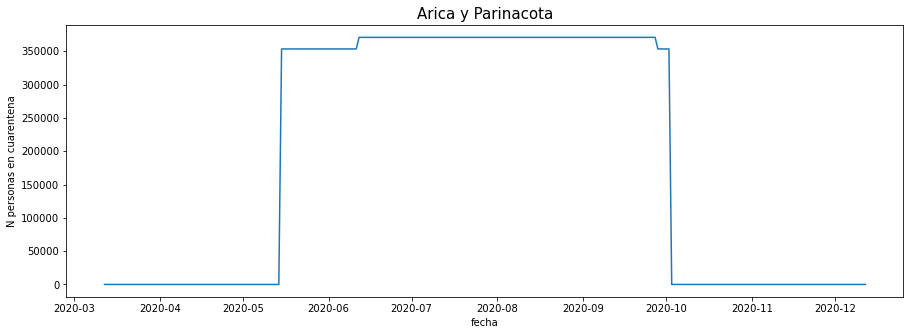


 La mayor cantidad de personas en cuarentena en la región de Arica y Parinacota se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857.0  personas en cuarentena


In [37]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena1)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Arica y Parinacota", fontsize = 15)
plt.show()
indicemin = cantcuarentena1.index(max(cantcuarentena1))
indicemax = len(cantcuarentena1) - cantcuarentena1[::-1].index(max(cantcuarentena1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Arica y Parinacota se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena1[indicemin], " personas en cuarentena" )

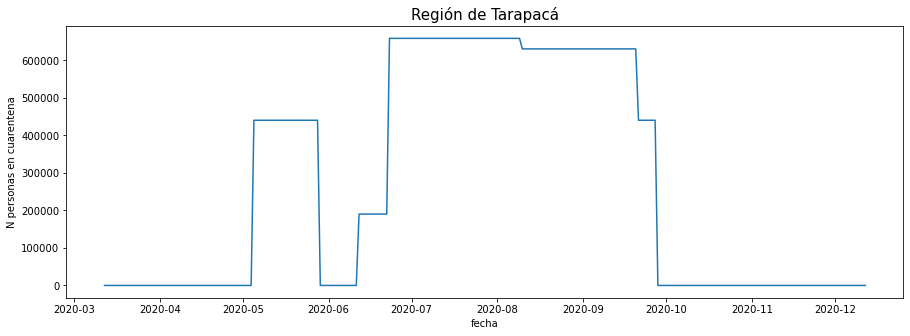


 La mayor cantidad de personas en cuarentena en la región de Tarapacá se dio entre las fechas  2020-06-23 00:00:00  y  2020-08-09 00:00:00  con un total de  658916.0  personas en cuarentena


In [38]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena2)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Tarapacá", fontsize = 15)
plt.show()
indicemin = cantcuarentena2.index(max(cantcuarentena2))
indicemax = len(cantcuarentena2) - cantcuarentena2[::-1].index(max(cantcuarentena2)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Tarapacá se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena2[indicemin], " personas en cuarentena" )

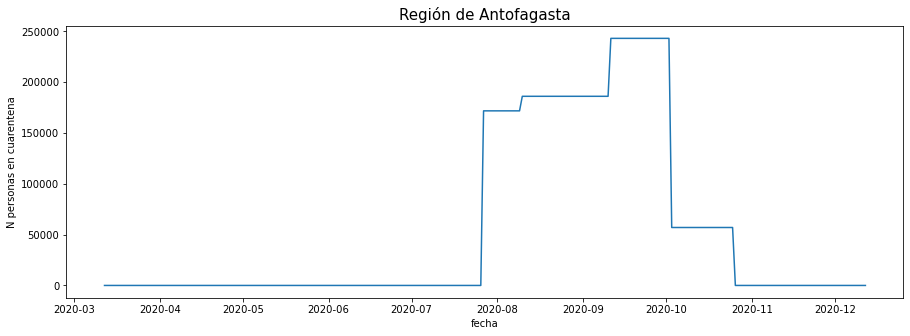


 La mayor cantidad de personas en cuarentena en la región de Antofagasta se dio entre las fechas  2020-09-11 00:00:00  y  2020-10-02 00:00:00  con un total de  243087.0  personas en cuarentena


In [36]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena3)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Antofagasta", fontsize = 15)
plt.show()
indicemin = cantcuarentena3.index(max(cantcuarentena3))
indicemax = len(cantcuarentena3) - cantcuarentena3[::-1].index(max(cantcuarentena3)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Antofagasta se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena3[indicemin], " personas en cuarentena" )

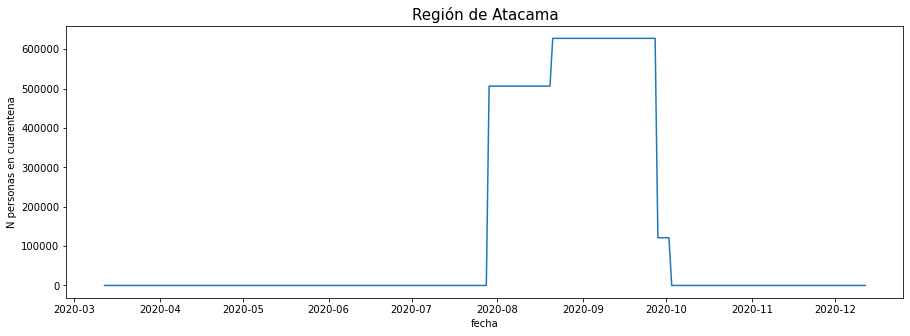


 La mayor cantidad de personas en cuarentena en la región de Atacama se dio entre las fechas  2020-08-21 00:00:00  y  2020-09-27 00:00:00  con un total de  627660.0  personas en cuarentena


In [39]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena4)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Atacama", fontsize = 15)
plt.show()
indicemin = cantcuarentena4.index(max(cantcuarentena4))
indicemax = len(cantcuarentena4) - cantcuarentena4[::-1].index(max(cantcuarentena4)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Atacama se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena4[indicemin], " personas en cuarentena" )

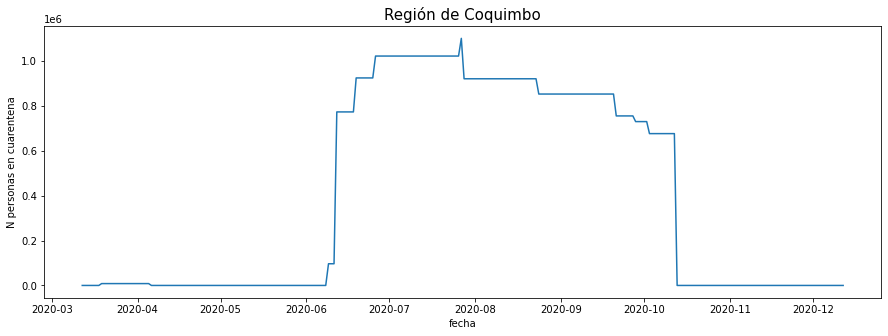


 La mayor cantidad de personas en cuarentena en la región de Coquimbo se dio entre las fechas  2020-07-27 00:00:00  y  2020-07-27 00:00:00  con un total de  1101935.0  personas en cuarentena


In [40]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena5)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Coquimbo", fontsize = 15)
plt.show()
indicemin = cantcuarentena5.index(max(cantcuarentena5))
indicemax = len(cantcuarentena5) - cantcuarentena5[::-1].index(max(cantcuarentena5)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Coquimbo se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena5[indicemin], " personas en cuarentena" )

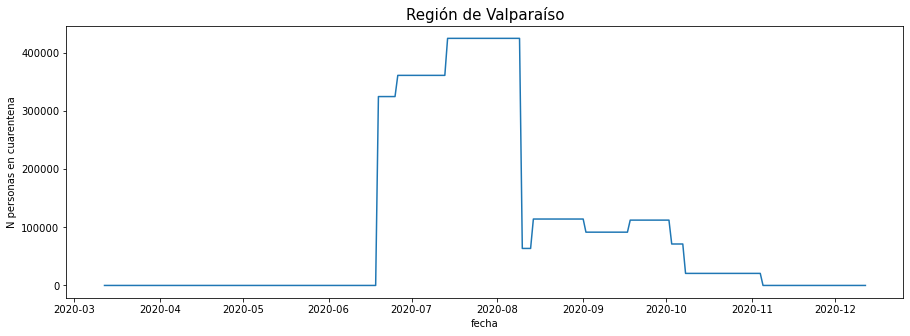


 La mayor cantidad de personas en cuarentena en la región de Valparaíso se dio entre las fechas  2020-07-14 00:00:00  y  2020-08-09 00:00:00  con un total de  425338.0  personas en cuarentena


In [41]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena6)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Valparaíso", fontsize = 15)
plt.show()
indicemin = cantcuarentena6.index(max(cantcuarentena6))
indicemax = len(cantcuarentena6) - cantcuarentena6[::-1].index(max(cantcuarentena6)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Valparaíso se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena6[indicemin], " personas en cuarentena" )

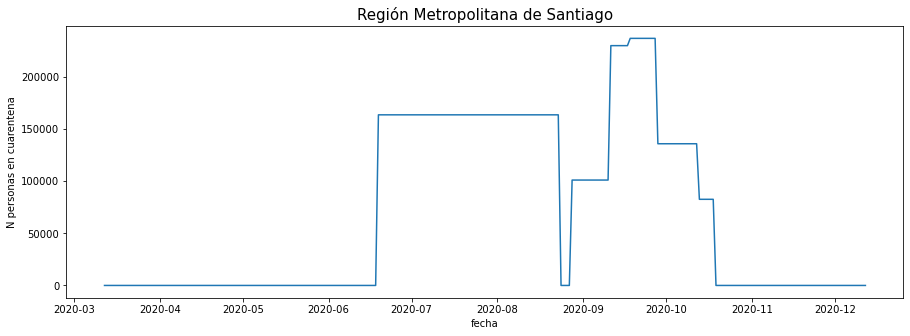


 La mayor cantidad de personas en cuarentena en la región Metropolitana de Santiago se dio entre las fechas  2020-09-18 00:00:00  y  2020-09-27 00:00:00  con un total de  236964.0  personas en cuarentena


In [42]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena7)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región Metropolitana de Santiago", fontsize = 15)
plt.show()
indicemin = cantcuarentena7.index(max(cantcuarentena7))
indicemax = len(cantcuarentena7) - cantcuarentena7[::-1].index(max(cantcuarentena7)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región Metropolitana de Santiago se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena7[indicemin], " personas en cuarentena" )

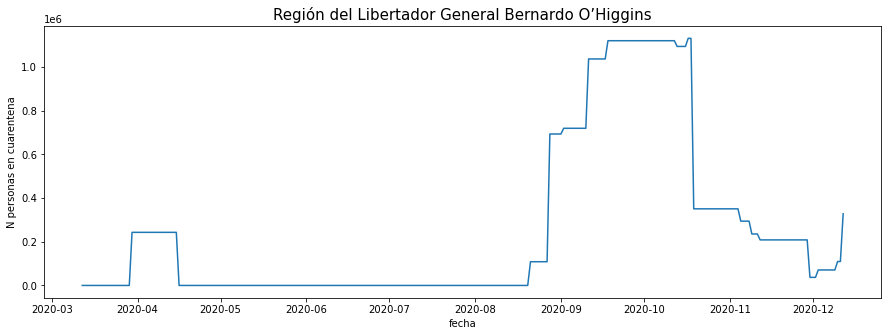


 La mayor cantidad de personas en cuarentena en la región del Libertador General Bernardo O’Higgins se dio entre las fechas  2020-10-17 00:00:00  y  2020-10-18 00:00:00  con un total de  1131488.0  personas en cuarentena


In [43]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena8)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Libertador General Bernardo O’Higgins", fontsize = 15)
plt.show()
indicemin = cantcuarentena8.index(max(cantcuarentena8))
indicemax = len(cantcuarentena8) - cantcuarentena8[::-1].index(max(cantcuarentena8)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Libertador General Bernardo O’Higgins se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena8[indicemin], " personas en cuarentena" )

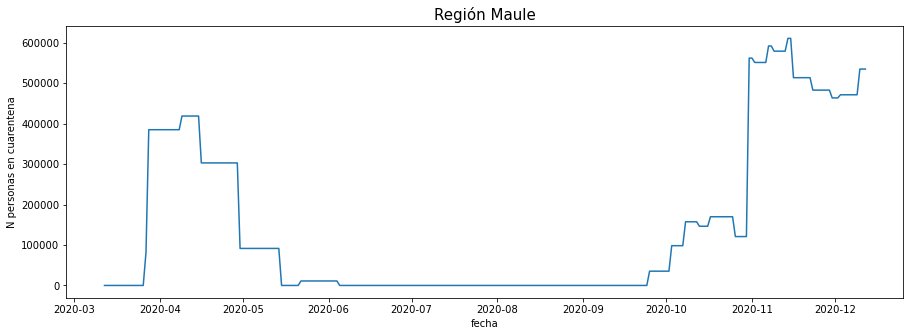


 La mayor cantidad de personas en cuarentena en la región Maule se dio entre las fechas  2020-11-14 00:00:00  y  2020-11-15 00:00:00  con un total de  610876.0  personas en cuarentena


In [44]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena9)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región Maule", fontsize = 15)
plt.show()
indicemin = cantcuarentena9.index(max(cantcuarentena9))
indicemax = len(cantcuarentena9) - cantcuarentena9[::-1].index(max(cantcuarentena9)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región Maule se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena9[indicemin], " personas en cuarentena" )

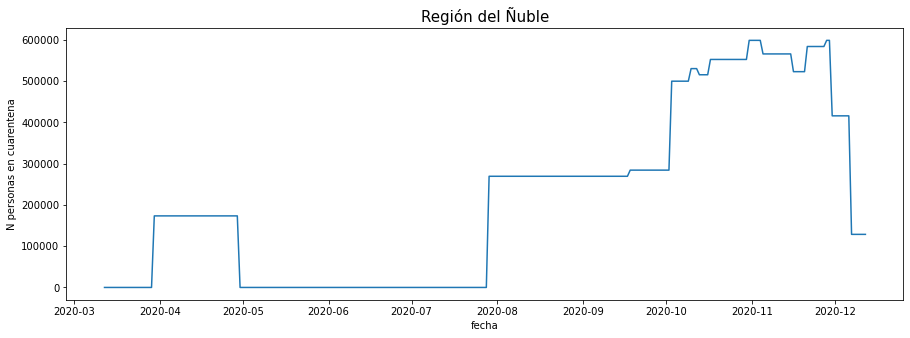


 La mayor cantidad de personas en cuarentena en la región del Ñuble se dio entre las fechas  2020-11-28 00:00:00  y  2020-11-29 00:00:00  con un total de  598786.0  personas en cuarentena


In [45]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena10)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Ñuble", fontsize = 15)
plt.show()
indicemin = cantcuarentena10.index(max(cantcuarentena10))
indicemax = len(cantcuarentena10) - cantcuarentena10[::-1].index(max(cantcuarentena10)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Ñuble se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena10[indicemin], " personas en cuarentena" )

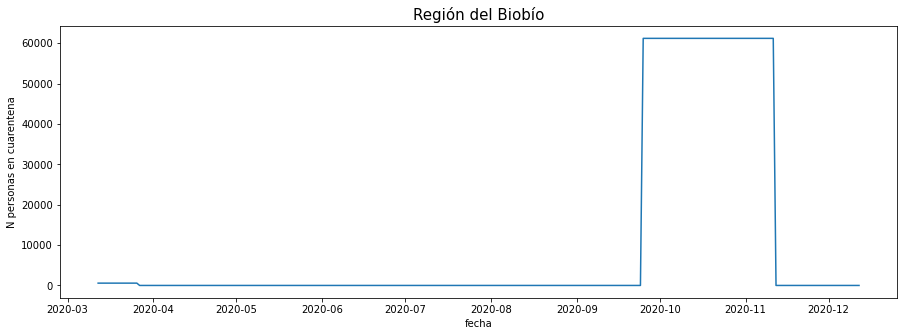


 La mayor cantidad de personas en cuarentena en la región del Biobío se dio entre las fechas  2020-09-25 00:00:00  y  2020-11-11 00:00:00  con un total de  61210.0  personas en cuarentena


In [46]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena11)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Biobío", fontsize = 15)
plt.show()
indicemin = cantcuarentena11.index(max(cantcuarentena11))
indicemax = len(cantcuarentena11) - cantcuarentena11[::-1].index(max(cantcuarentena11)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Biobío se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena11[indicemin], " personas en cuarentena" )

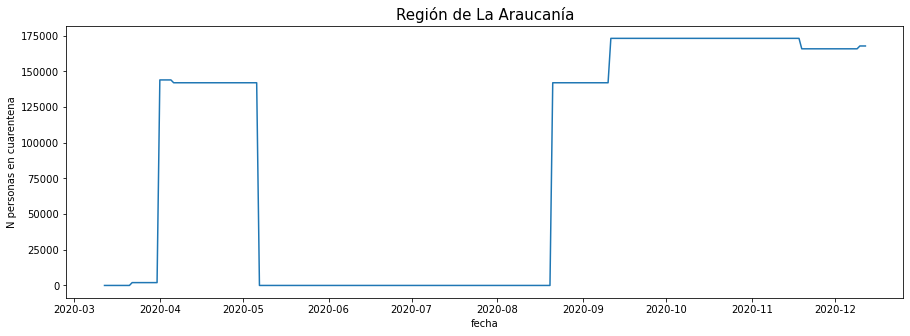


 La mayor cantidad de personas en cuarentena en la región de La Araucanía se dio entre las fechas  2020-09-11 00:00:00  y  2020-11-18 00:00:00  con un total de  173089.0  personas en cuarentena


In [47]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena12)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de La Araucanía", fontsize = 15)
plt.show()
indicemin = cantcuarentena12.index(max(cantcuarentena12))
indicemax = len(cantcuarentena12) - cantcuarentena12[::-1].index(max(cantcuarentena12)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de La Araucanía se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena12[indicemin], " personas en cuarentena" )

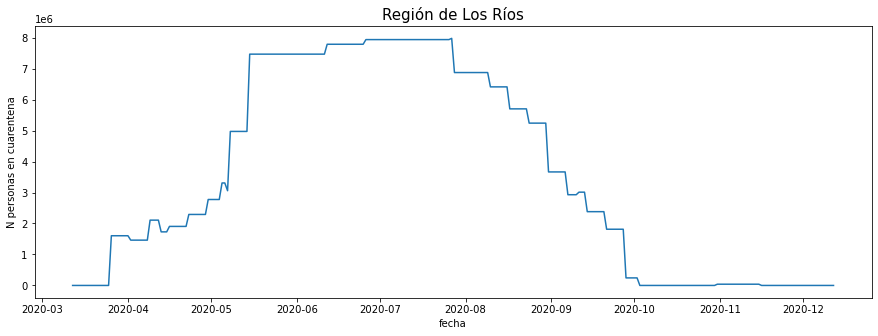


 La mayor cantidad de personas en cuarentena en la regiónde Los Ríos se dio entre las fechas  2020-07-27 00:00:00  y  2020-07-27 00:00:00  con un total de  7977589.0  personas en cuarentena


In [51]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena13)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Los Ríos", fontsize = 15)
plt.show()
indicemin = cantcuarentena13.index(max(cantcuarentena13))
indicemax = len(cantcuarentena13) - cantcuarentena13[::-1].index(max(cantcuarentena13)) - 1
print("\n La mayor cantidad de personas en cuarentena en la regiónde Los Ríos se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena13[indicemin], " personas en cuarentena" )

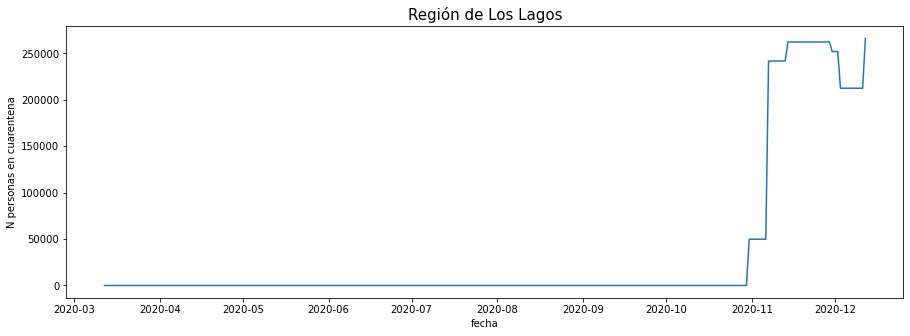


 La mayor cantidad de personas en cuarentena en la región de Los Lagos se dio entre las fechas  2020-12-12 00:00:00  y  2020-12-12 00:00:00  con un total de  266276.0  personas en cuarentena


In [52]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena14)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Los Lagos", fontsize = 15)
plt.show()
indicemin = cantcuarentena14.index(max(cantcuarentena14))
indicemax = len(cantcuarentena14) - cantcuarentena14[::-1].index(max(cantcuarentena14)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Los Lagos se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena14[indicemin], " personas en cuarentena" )

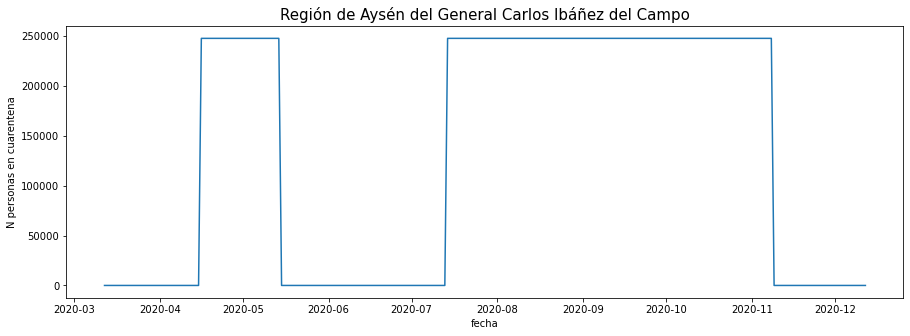


 La mayor cantidad de personas en cuarentena en la región de Aysén del General Carlos Ibáñez del Campo se dio entre las fechas  2020-04-16 00:00:00  y  2020-11-08 00:00:00  con un total de  247552.0  personas en cuarentena


In [53]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena15)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Aysén del General Carlos Ibáñez del Campo", fontsize = 15)
plt.show()
indicemin = cantcuarentena15.index(max(cantcuarentena15))
indicemax = len(cantcuarentena15) - cantcuarentena15[::-1].index(max(cantcuarentena15)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Aysén del General Carlos Ibáñez del Campo se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena15[indicemin], " personas en cuarentena" )

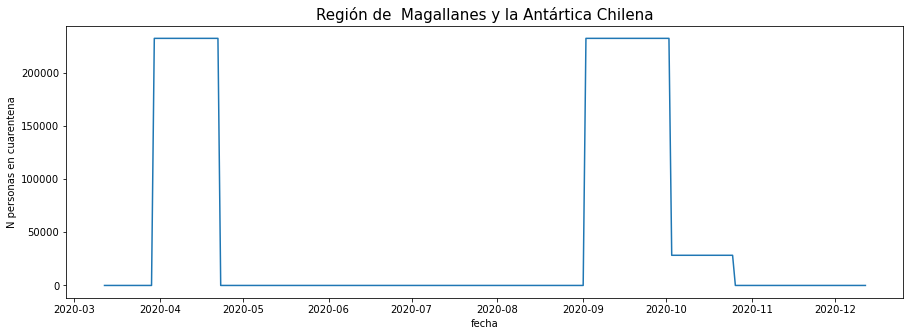


 La mayor cantidad de personas en cuarentena en la región de  Magallanes y la Antártica Chilena se dio entre las fechas  2020-03-30 00:00:00  y  2020-10-02 00:00:00  con un total de  232451.0  personas en cuarentena


In [54]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, cantcuarentena16)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de  Magallanes y la Antártica Chilena", fontsize = 15)
plt.show()
indicemin = cantcuarentena16.index(max(cantcuarentena16))
indicemax = len(cantcuarentena16) - cantcuarentena16[::-1].index(max(cantcuarentena16)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de  Magallanes y la Antártica Chilena se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", cantcuarentena16[indicemin], " personas en cuarentena" )